<a href="https://colab.research.google.com/github/chill-br/ajay/blob/main/handwritten_digit_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

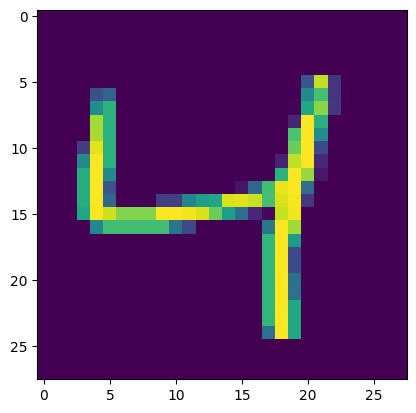

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 3ms/step - loss: 0.2828 - accuracy: 0.9160 - val_loss: 0.1474 - val_accuracy: 0.9571
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.1293 - val_accuracy: 0.9598
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.1074 - val_accuracy: 0.9679
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.0962 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0955 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0974 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0984 - val_accuracy

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9781

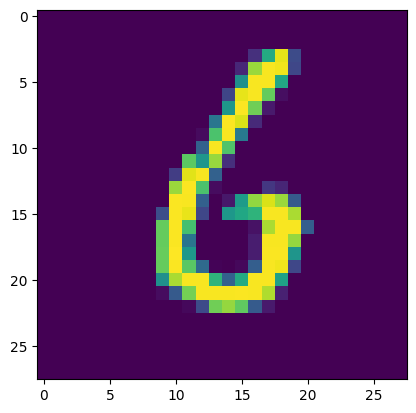

In [ ]:
plt.imshow(X_test[50])

In [ ]:
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([6])

handwritten classification  using cnn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('mnist_cnn_model.h5')

Epoch 1/5
844/844 [==============================] - 6s 6ms/step - loss: 0.3329 - accuracy: 0.8977 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.1087 - accuracy: 0.9693 - val_loss: 0.0522 - val_accuracy: 0.9845
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0780 - accuracy: 0.9776 - val_loss: 0.0476 - val_accuracy: 0.9875
Epoch 4/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0606 - accuracy: 0.9834 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9904
Test accuracy: 99.04%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9875

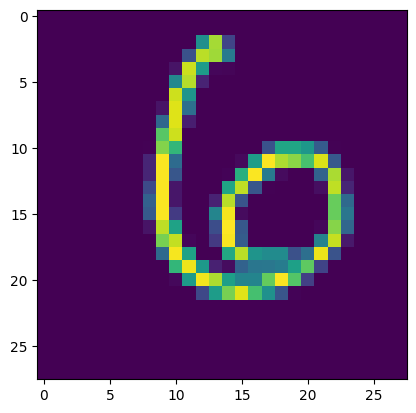

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[100])

In [ ]:
model.predict(X_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([6])